<a href="https://colab.research.google.com/github/SwanandKale/AIML_Bootcamp/blob/main/Insight_from_Mall_Customer_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dataset='/content/drive/MyDrive/ALML DataSets/Mall_Customers.csv'

import pandas as pd
df=pd.read_csv(dataset)

In [ ]:
df=df.drop(['CustomerID'],axis=1)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
print(df.isna().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [ ]:
#Visualization

import seaborn as sns
data=df[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)']]
sns.heatmap(data.corr(),annot=True)

KeyError: ignored

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

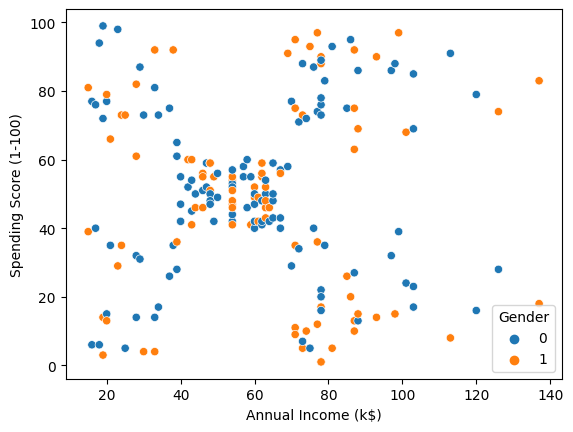

In [ ]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

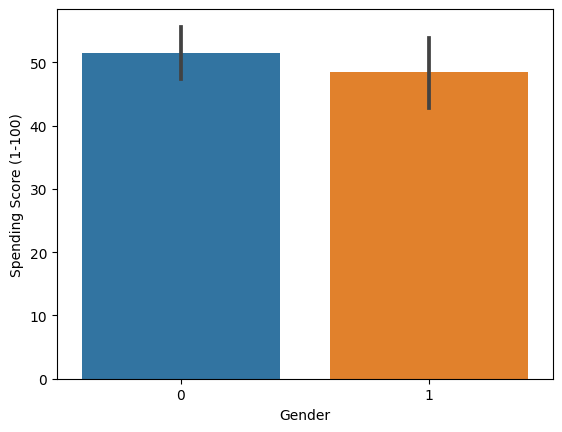

In [ ]:
sns.barplot(data=df, x='Gender', y='Spending Score (1-100)')

In [ ]:
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='')

ValueError: ignored

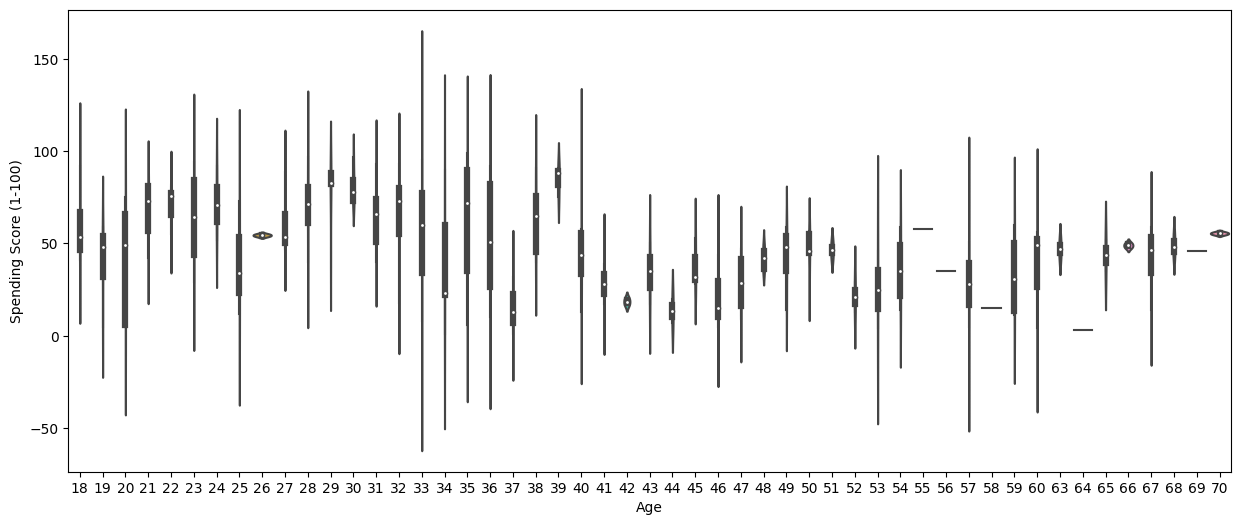

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.violinplot(data=df, x='Age', y='Spending Score (1-100)')
plt.show()

In [ ]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


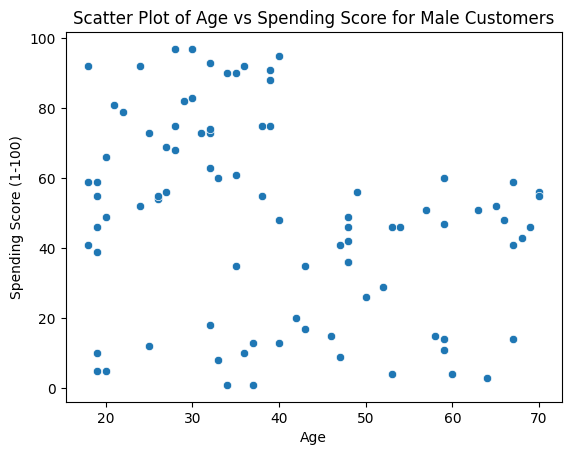

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for female customers
male_df = df[df['Gender'] == 1]

# Create the scatter plot
sns.scatterplot(data=male_df, x='Age', y='Spending Score (1-100)')

# Set plot title and axes labels
plt.title('Scatter Plot of Age vs Spending Score for Male Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# Display the plot
plt.show()

In [ ]:
#After Preprocessing

from sklearn.cluster import KMeans

#Initiate the model
Km=KMeans(n_clusters=6) #it will create two centrioids -> which datapoint into which cluster

clusters=Km.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3, 0,
       3, 4, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 5, 2, 5, 2, 5, 2,
       0, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2], dtype=int32)

In [ ]:
df['label']=clusters

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,19,15,39,1
1,1,21,15,81,4
2,0,20,16,6,1
3,0,23,16,77,4
4,0,31,17,40,1
...,...,...,...,...,...
195,0,35,120,79,3
196,0,45,126,28,0
197,1,32,126,74,3
198,1,32,137,18,0


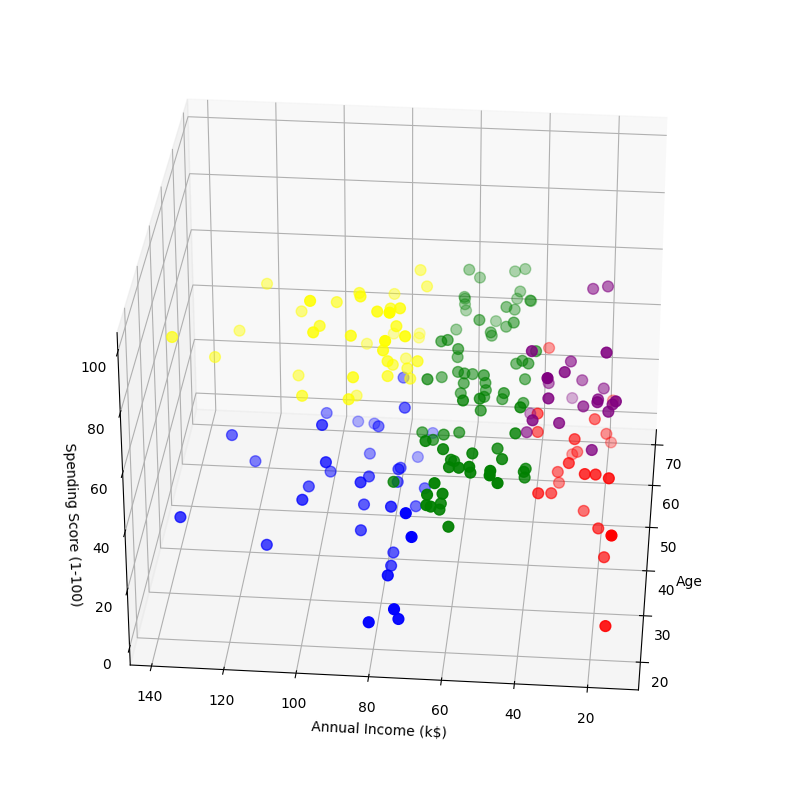

In [ ]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D




fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)

ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='yellow', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.scatter(df.Age[df.label == 5], df["Annual Income (k$)"][df.label == 5], df["Spending Score (1-100)"][df.label == 5], c='black', s=60)




ax.view_init(30, 185)

plt.xlabel("Age")

plt.ylabel("Annual Income (k$)")

ax.set_zlabel('Spending Score (1-100)')

plt.show()

In [ ]:
#lets plot wcss vs k(num of clusters) -> withing cluster sum of squares

# lets plot WCSS vs k(num of clusters)

#calculate WCSS for diff K values

In [ ]:
wcss=[]
for k in range(1,11):
  Kmeans=KMeans(n_clusters=k)
  Kmeans.fit(df)

  wcss.append(Kmeans.inertia_)

  #computing WCSS for fitted model using intertia_ attribute of K means instance : Interia :: How far is the datapoint from centroid
  #lower the value better the cluster

  print(wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[308939.05500000005]
[308939.05500000005, 212935.9918158568]
[308939.05500000005, 212935.9918158568, 143391.59236035676]
[308939.05500000005, 212935.9918158568, 143391.59236035676, 104414.67534220168]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[308939.05500000005, 212935.9918158568, 143391.59236035676, 104414.67534220168, 75401.56478110346]
[308939.05500000005, 212935.9918158568, 143391.59236035676, 104414.67534220168, 75401.56478110346, 58351.4045212098]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[308939.05500000005, 212935.9918158568, 143391.59236035676, 104414.67534220168, 75401.56478110346, 58351.4045212098, 51169.96052631579]
[308939.05500000005, 212935.9918158568, 143391.59236035676, 104414.67534220168, 75401.56478110346, 58351.4045212098, 51169.96052631579, 44359.21854091855]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[308939.05500000005, 212935.9918158568, 143391.59236035676, 104414.67534220168, 75401.56478110346, 58351.4045212098, 51169.96052631579, 44359.21854091855, 40657.57192807193]
[308939.05500000005, 212935.9918158568, 143391.59236035676, 104414.67534220168, 75401.56478110346, 58351.4045212098, 51169.96052631579, 44359.21854091855, 40657.57192807193, 37484.11375179043]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Wcss -- Variance error------->')

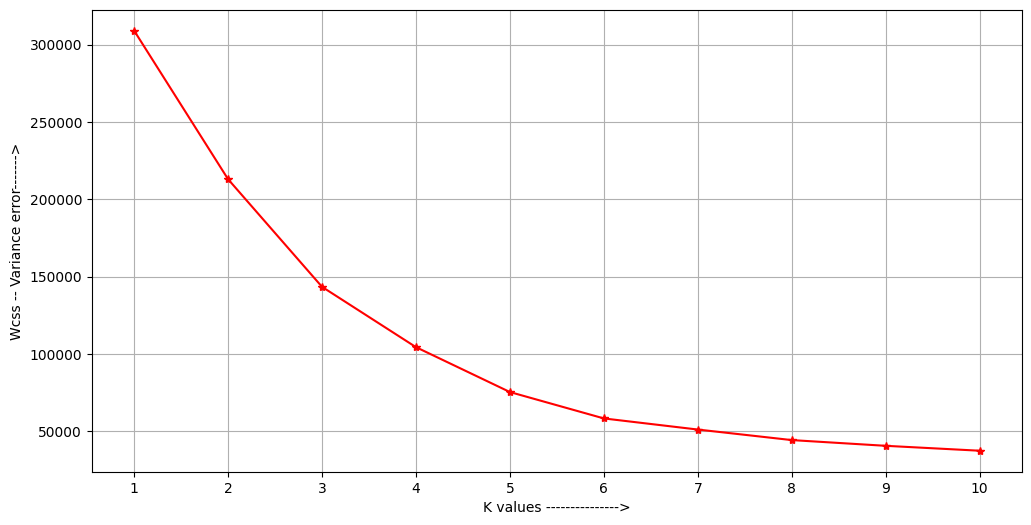

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))

plt.plot(range(1,11),wcss,color="red",marker="*")
plt.grid()
plt.xlabel("K values --------------->")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Wcss -- Variance error------->")